In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.preprocessing._encoders import OrdinalEncoder

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
train_file = '/Users/fkj/Desktop/titanic/train.csv'
test_file = '/Users/fkj/Desktop/titanic/tested.csv'

df = pd.read_csv(train_file)
df = df.append(pd.read_csv(test_file))

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


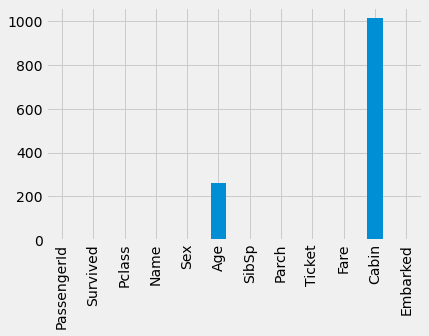

In [4]:
df.isnull().sum().plot(kind='bar')
plt.savefig('/Users/fkj/Desktop/titanic/0.png', dpi = 400, bbox_inches='tight')
plt.show()

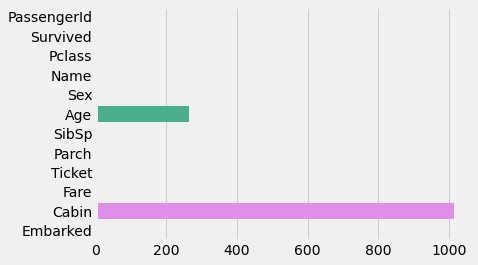

In [5]:
s = df.isnull().sum()
fig = sns.barplot(y=s.index,x=s.values,orient='h')
scatter_fig = fig.get_figure()
scatter_fig.savefig('/Users/fkj/Desktop/titanic/1.png', dpi = 400, bbox_inches='tight')

In [6]:
df_processed = df.copy().drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df_processed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
df_processed.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [8]:
df_processed = df_processed.dropna(subset=['Embarked'])
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1307 non-null   int64  
 1   Pclass    1307 non-null   int64  
 2   Sex       1307 non-null   object 
 3   Age       1044 non-null   float64
 4   SibSp     1307 non-null   int64  
 5   Parch     1307 non-null   int64  
 6   Fare      1306 non-null   float64
 7   Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 91.9+ KB


In [9]:
encoder = OrdinalEncoder()
df_processed.Sex = encoder.fit_transform(df_processed.Sex.to_numpy().reshape(-1,1))

encoder = OrdinalEncoder()
df_processed.Embarked = encoder.fit_transform(df_processed.Embarked.to_numpy().reshape(-1,1))

In [10]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1307 non-null   int64  
 1   Pclass    1307 non-null   int64  
 2   Sex       1307 non-null   float64
 3   Age       1044 non-null   float64
 4   SibSp     1307 non-null   int64  
 5   Parch     1307 non-null   int64  
 6   Fare      1306 non-null   float64
 7   Embarked  1307 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 91.9 KB


In [11]:
mean_age = df_processed.Age.mean()
df_processed.Age.fillna(mean_age,inplace=True)
df_processed.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [12]:
mean_Fare = df_processed.Fare.mean()
df_processed.Fare.fillna(mean_Fare,inplace=True)
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1307 non-null   int64  
 1   Pclass    1307 non-null   int64  
 2   Sex       1307 non-null   float64
 3   Age       1307 non-null   float64
 4   SibSp     1307 non-null   int64  
 5   Parch     1307 non-null   int64  
 6   Fare      1307 non-null   float64
 7   Embarked  1307 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 91.9 KB


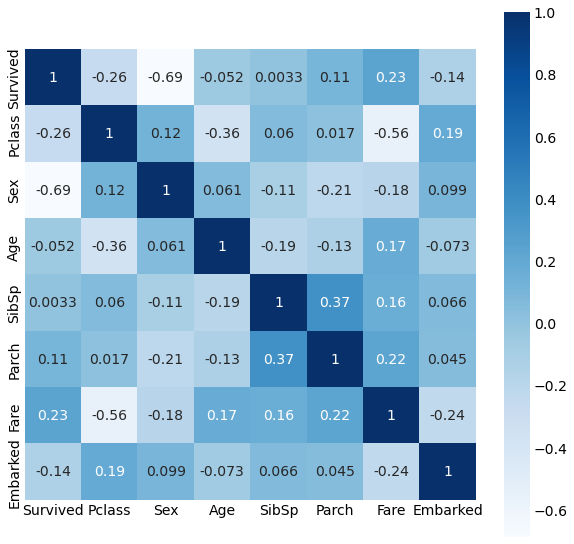

In [13]:
df_coor=df_processed.corr()
plt.subplots(figsize=(9,9),facecolor='w')
fig=sns.heatmap(df_coor,annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g')
scatter_fig = fig.get_figure()
scatter_fig.savefig('/Users/fkj/Desktop/titanic/2.png', dpi = 400, bbox_inches='tight')

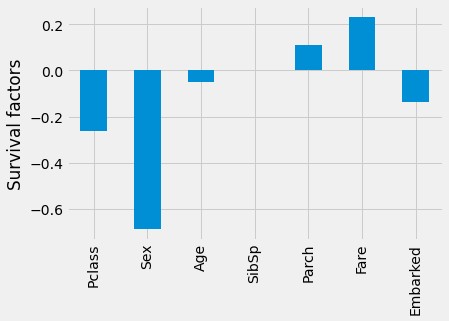

In [14]:
bar_plt = df_coor.pop('Survived')
bar_plt.pop('Survived')
bar_plt.plot(kind='bar')
plt.ylabel("Survival factors")
plt.savefig('/Users/fkj/Desktop/titanic/3.png', dpi = 400, bbox_inches='tight')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

y = df_processed.pop('Survived')
x = df_processed

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=7)

In [16]:
from sklearn.preprocessing import StandardScaler
# Scling Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [17]:
from torch import nn
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(7, 32)
        self.hidden2 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)
        
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        
        return x

In [18]:
model = Network()

In [19]:
import torch

optimizer = torch.optim.SGD(model.parameters(),lr = 0.1)
loss_func = torch.nn.MSELoss()

In [20]:
from torch.autograd import Variable

x_tra = Variable(torch.from_numpy(X_train))
x_tra = x_tra.float()
y_tra = np.array(y_train,dtype=np.float64)
y_tra = Variable(torch.from_numpy(y_tra))
y_tra = y_tra.float()
 
x_val = Variable(torch.from_numpy(X_test))
x_val = x_val.float()
y_val = np.array(y_test,dtype=np.float64)
y_val = Variable(torch.from_numpy(y_val))
y_val = y_val.float()


In [21]:
from torch.utils.data import TensorDataset, DataLoader

batch_size = 100

train_dataset = TensorDataset(x_tra, y_tra)
test_dataset = TensorDataset(x_val, y_val)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

train_dataloader

In [22]:
from tqdm.auto import tqdm
EPOCHS = 300
REDRAW_EVERY = 5
loss_train_x = []
loss_train_y = []
val_loss_train_x = []
val_loss_train_y = []
steps_per_epoch = len(train_dataset)
steps_per_epoch_val = len(test_dataset)
for epoch in range(EPOCHS):
    running_loss = 0.0
    model.train()
    for i, batch in enumerate(train_dataset, 0):
        inputs, labels = batch

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / steps_per_epoch:.3f}')
    loss_train_x.append(epoch)
    loss_train_y.append(running_loss / steps_per_epoch)
    print(f'[{epoch + 1}, {i + 1:5d}] val loss: {running_loss / steps_per_epoch_val:.3f}')
    val_loss_train_x.append(epoch)
    val_loss_train_y.append(running_loss / steps_per_epoch_val)
print('Обучение закончено')

/Users/fkj/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1,  1045] loss: 0.125
[1,  1045] val loss: 0.499
[2,  1045] loss: 0.107
[2,  1045] val loss: 0.429
[3,  1045] loss: 0.105
[3,  1045] val loss: 0.419
[4,  1045] loss: 0.104
[4,  1045] val loss: 0.413
[5,  1045] loss: 0.103
[5,  1045] val loss: 0.411
[6,  1045] loss: 0.102
[6,  1045] val loss: 0.407
[7,  1045] loss: 0.102
[7,  1045] val loss: 0.406
[8,  1045] loss: 0.102
[8,  1045] val loss: 0.406
[9,  1045] loss: 0.101
[9,  1045] val loss: 0.404
[10,  1045] loss: 0.101
[10,  1045] val loss: 0.402
[11,  1045] loss: 0.101
[11,  1045] val loss: 0.402
[12,  1045] loss: 0.101
[12,  1045] val loss: 0.403
[13,  1045] loss: 0.100
[13,  1045] val loss: 0.400
[14,  1045] loss: 0.100
[14,  1045] val loss: 0.400
[15,  1045] loss: 0.100
[15,  1045] val loss: 0.399
[16,  1045] loss: 0.099
[16,  1045] val loss: 0.397
[17,  1045] loss: 0.099
[17,  1045] val loss: 0.395
[18,  1045] loss: 0.099
[18,  1045] val loss: 0.394
[19,  1045] loss: 0.099
[19,  1045] val loss: 0.394
[20,  1045] loss: 0.099
[20,  

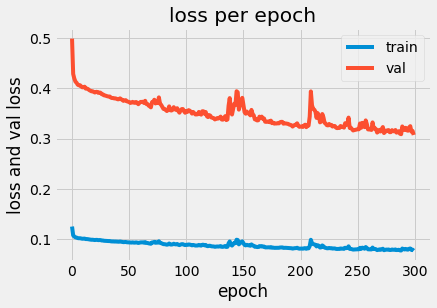

In [23]:
plt.plot(loss_train_x, loss_train_y, label='train')
plt.plot(val_loss_train_x, val_loss_train_y, label='val')
plt.grid(which='minor', c='lightgrey')
plt.xlabel("epoch")
plt.ylabel("loss and val loss")
plt.title("loss per epoch")
plt.legend(loc='best')
plt.savefig('/Users/fkj/Desktop/titanic/4.png', dpi = 400, bbox_inches='tight')
plt.show()

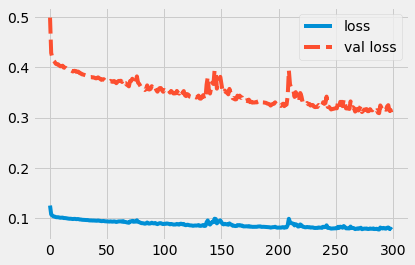

In [24]:
some_dict = {} 
some_dict['loss']=loss_train_y 
some_dict['val loss']=val_loss_train_y  
loss_train = pd.DataFrame(some_dict)
fig = sns.lineplot(data=loss_train)
scatter_fig = fig.get_figure()
scatter_fig.savefig('/Users/fkj/Desktop/titanic/5.png', dpi = 400, bbox_inches='tight')

In [25]:
testman = X_train[5]
testman = Variable(torch.from_numpy(testman))
testman = testman.float()
pred = model(testman)
print(pred)

tensor([0.0019], grad_fn=<SigmoidBackward0>)


In [26]:
y_train[5]

5    0
5    0
Name: Survived, dtype: int64

In [27]:
y_test_pred = []

for i, batch in enumerate(test_dataset, 0):
        inputs, labels = batch

        optimizer.zero_grad()

        outputs = model(inputs)
        y_test_pred += outputs
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()

y_test_pred

/Users/fkj/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[tensor(0.0111, grad_fn=<UnbindBackward0>),
 tensor(3.4685e-05, grad_fn=<UnbindBackward0>),
 tensor(0.0717, grad_fn=<UnbindBackward0>),
 tensor(0.0036, grad_fn=<UnbindBackward0>),
 tensor(0.0671, grad_fn=<UnbindBackward0>),
 tensor(1., grad_fn=<UnbindBackward0>),
 tensor(5.2816e-06, grad_fn=<UnbindBackward0>),
 tensor(0.9784, grad_fn=<UnbindBackward0>),
 tensor(0.3583, grad_fn=<UnbindBackward0>),
 tensor(0.0619, grad_fn=<UnbindBackward0>),
 tensor(1.9159e-07, grad_fn=<UnbindBackward0>),
 tensor(6.9339e-06, grad_fn=<UnbindBackward0>),
 tensor(0.0009, grad_fn=<UnbindBackward0>),
 tensor(0.6494, grad_fn=<UnbindBackward0>),
 tensor(0.9839, grad_fn=<UnbindBackward0>),
 tensor(0.0837, grad_fn=<UnbindBackward0>),
 tensor(4.5050e-07, grad_fn=<UnbindBackward0>),
 tensor(0.0585, grad_fn=<UnbindBackward0>),
 tensor(5.4107e-10, grad_fn=<UnbindBackward0>),
 tensor(0.0214, grad_fn=<UnbindBackward0>),
 tensor(0.1020, grad_fn=<UnbindBackward0>),
 tensor(0.0014, grad_fn=<UnbindBackward0>),
 tensor(0.99

In [28]:
def step(x=''):
    if x >0.5:
        return 1
    else:
        return 0
y_test_pred_np = []
for i in y_test_pred:
    a = i.detach().numpy()
    b = step(a)
    #print(b)
    y_test_pred_np.append(b)

print(y_test_pred_np)

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1]


In [29]:
y_test_true = []
for i in y_test:
    y_test_true.append(i)
y_test_true

[0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,


In [30]:
yp = pd.Series(y_test_pred_np).value_counts() 
yt = pd.Series(y_test_true).value_counts()
yt 

0    170
1     92
dtype: int64

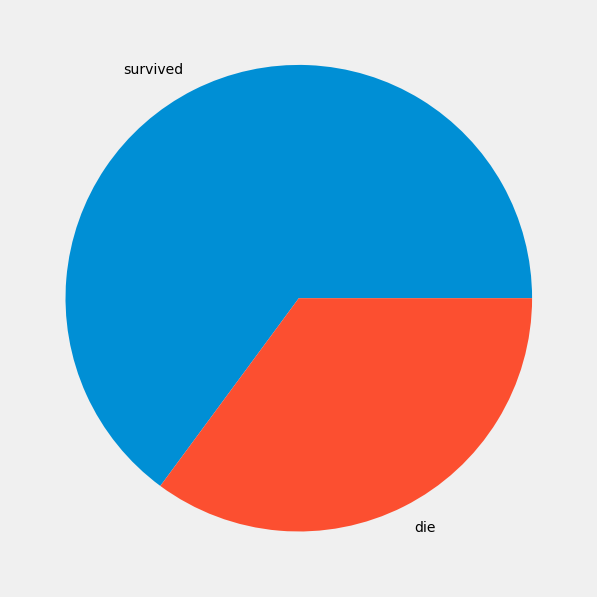

In [31]:
plt.rcParams['figure.figsize']=[10,10]
labels =[ 'survived','die']
plt.pie(yt,labels=labels)
plt.savefig('/Users/fkj/Desktop/titanic/6.png', dpi = 400, bbox_inches='tight')
plt.show()

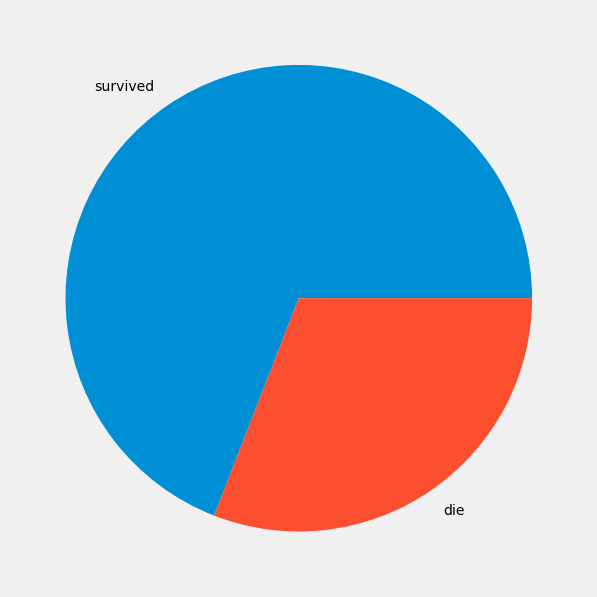

In [32]:
plt.rcParams['figure.figsize']=[10,10]
labels =[ 'survived','die']
plt.pie(yp,labels=labels)
plt.savefig('/Users/fkj/Desktop/titanic/7.png', dpi = 400, bbox_inches='tight')
plt.show()

In [33]:
y_train_pred = []

for i, batch in enumerate(train_dataset, 0):
        inputs, labels = batch

        optimizer.zero_grad()

        outputs = model(inputs)
        y_train_pred += outputs
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()

y_train_pred

[tensor(0.0086, grad_fn=<UnbindBackward0>),
 tensor(0.0369, grad_fn=<UnbindBackward0>),
 tensor(0.9997, grad_fn=<UnbindBackward0>),
 tensor(4.9869e-07, grad_fn=<UnbindBackward0>),
 tensor(0.6452, grad_fn=<UnbindBackward0>),
 tensor(0.0021, grad_fn=<UnbindBackward0>),
 tensor(0.2728, grad_fn=<UnbindBackward0>),
 tensor(0.0231, grad_fn=<UnbindBackward0>),
 tensor(0.0161, grad_fn=<UnbindBackward0>),
 tensor(0.9978, grad_fn=<UnbindBackward0>),
 tensor(1.0000, grad_fn=<UnbindBackward0>),
 tensor(0.0185, grad_fn=<UnbindBackward0>),
 tensor(0.0834, grad_fn=<UnbindBackward0>),
 tensor(0.0166, grad_fn=<UnbindBackward0>),
 tensor(0.2127, grad_fn=<UnbindBackward0>),
 tensor(0.7663, grad_fn=<UnbindBackward0>),
 tensor(0.6850, grad_fn=<UnbindBackward0>),
 tensor(0.0572, grad_fn=<UnbindBackward0>),
 tensor(0.9918, grad_fn=<UnbindBackward0>),
 tensor(0.4878, grad_fn=<UnbindBackward0>),
 tensor(0.1698, grad_fn=<UnbindBackward0>),
 tensor(0.0427, grad_fn=<UnbindBackward0>),
 tensor(0.0796, grad_fn=<Unb

In [34]:
y_train_pred_np = []
for i in y_train_pred:
    a = i.detach().numpy()
    b = step(a)
    #print(b)
    y_train_pred_np.append(b)

print(y_train_pred_np)

[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 

In [35]:
y_train_true = []
for i in y_train:
    y_train_true.append(i)
y_train_true

[0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,


In [36]:
ypdf = pd.DataFrame(y_train_pred_np,columns=['survived'])
ytdf = pd.DataFrame(y_train_true,columns=['survived'])

/Users/fkj/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


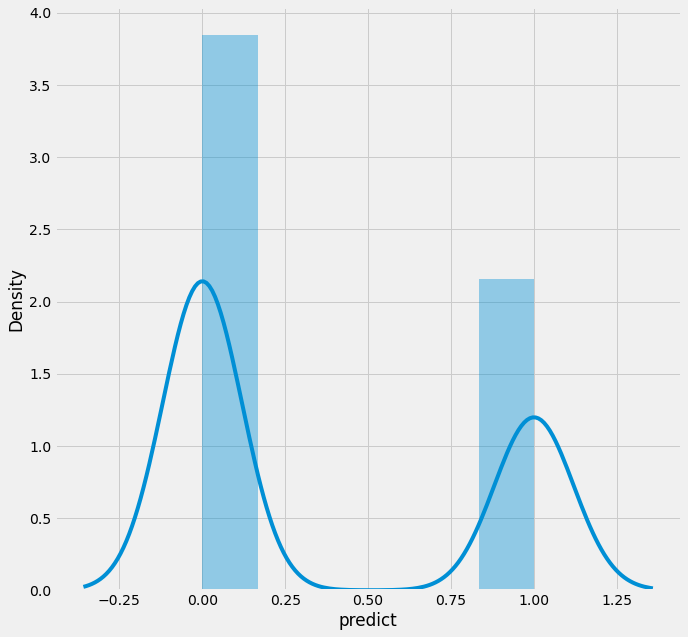

In [37]:
plt.xlabel('predict')
fig = sns.distplot(ypdf)
scatter_fig = fig.get_figure()
scatter_fig.savefig('/Users/fkj/Desktop/titanic/8.png', dpi = 400, bbox_inches='tight')

/Users/fkj/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


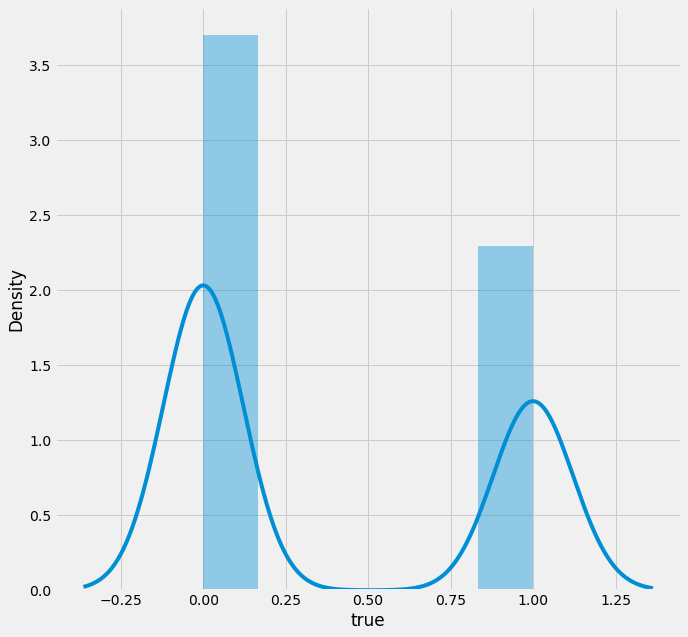

In [38]:
plt.xlabel('true')
fig = sns.distplot(ytdf)
scatter_fig = fig.get_figure()
scatter_fig.savefig('/Users/fkj/Desktop/titanic/9.png', dpi = 400, bbox_inches='tight')

In [39]:
import netron
data_onnx = torch.rand(7)
onnx_path = "/Users/fkj/Desktop/titanic/model.onnx"
torch.onnx.export(model, data_onnx, onnx_path)
netron.start(onnx_path)

Serving '/Users/fkj/Desktop/titanic/model.onnx' at http://localhost:8080


('localhost', 8080)